# **MNIST - Categorical Classification**

> # **Overfitting Issue**

## **Import TensorFlow**

In [1]:
import warnings
warnings.filterwarnings('ignore')

- import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.5.0'

- GPU 설정 확인

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

# **I. MNIST Data_Set Load & Review**

> ## **1) Load MNIST Data_Set**

In [4]:
from tensorflow.keras.datasets import mnist

(X_train, y_train,), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


- Train_Data Information

In [5]:
print(len(X_train))
print(X_train.shape)

print('')

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)

60000
[5 0 4 1 9]


- Test_Data Information

In [6]:
print(len(X_test))
print(X_test.shape)

print('')

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)

10000
[7 2 1 0 4]


> ## **2) Visualization**

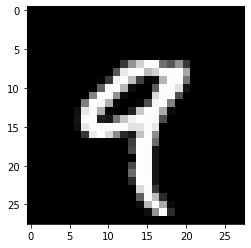

In [7]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap='gray')
plt.show()

In [8]:
import numpy as np
np.set_printoptions(linewidth=150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# **II. Data Preprocessing**

> ## **1) Reshape and Normalization**

- reshape
  - (60000, 28, 28) to (60000, 784)

In [9]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

- Normalization

In [10]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [11]:
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

> ## **2) One-Hot Encoding**

In [12]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# **III. MNIST Keras Modeling**

> ## **1) Model Define**

- 모델 신경망 구조 정의
  - 2개의 Hidden Layers & 768개의 Nodes
  - 복잡한 Model Capacity로 인한 Overfitting

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(256, activation='relu', input_shape=(28 * 28, )))
# mnist.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
# mnist.add(layers.Dense(256, activation='relu'))
mnist.add(layers.Dense(10, activation='softmax'))

- 모델 구조 확인

In [15]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


> ## **2) Model Compile**

- 모델 학습 방법 설정

In [16]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

> ## **3) Model Fit**

- 약 3분

In [17]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 4ms/step - loss: 0.3207 - accuracy: 0.9100 - val_loss: 0.1845 - val_accuracy: 0.9456
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1453 - accuracy: 0.9579 - val_loss: 0.1177 - val_accuracy: 0.9665
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0988 - accuracy: 0.9715 - val_loss: 0.1063 - val_accuracy: 0.9696
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0739 - accuracy: 0.9785 - val_loss: 0.0942 - val_accuracy: 0.9737
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0573 - accuracy: 0.9829 - val_loss: 0.0936 - val_accuracy: 0.9734
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0451 - accuracy: 0.9872 - val_loss: 0.0876 - val_accuracy: 0.9768
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0368 - accuracy: 0.9898 - val_loss: 0.0917 - val_accuracy: 0.9765

> ## **4) 학습 결과 시각화**

- Loss Visualization

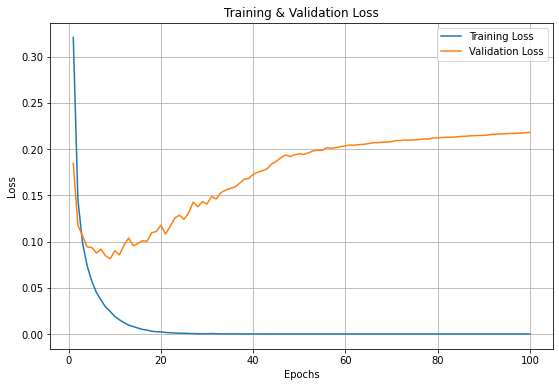

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

**Training과 Validation의 Loss 간격이 넓으면 Overfitting → 간격이 줄어듦**

> ## **5) Model Evaluate**

- Loss & Accuracy

In [19]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1759 - accuracy: 0.9820
Loss = 0.17593
Accuracy = 0.98200


> ## **6) Model Predict**

- Probability

In [20]:
np.set_printoptions(suppress=True, precision=9)

print(mnist.predict(X_test[:1, :]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


- Class

In [21]:
print(mnist.predict_classes(X_test[:1, :]))

[7]
